In [6]:
import matplotlib.pyplot as plt

import xgi

In [2]:
H_enron = xgi.load_xgi_data("email-enron")


In [3]:
print(f"The hypergraph has {H_enron.num_nodes} nodes and {H_enron.num_edges} edges")
print(H_enron)


The hypergraph has 148 nodes and 10885 edges
Hypergraph named email-Enron with 148 nodes and 10885 hyperedges


In [4]:
print("The first 10 node IDs are:")
print(list(H_enron.nodes)[:10])
print("The first 10 edge IDs are:")
print(list(H_enron.edges)[:10])
print("The attributes of node '4' are")
print(H_enron.nodes["4"])
print("The attributes of edge '6' are")
print(H_enron.edges["6"])

The first 10 node IDs are:
['4', '1', '117', '129', '51', '41', '65', '107', '122', '29']
The first 10 edge IDs are:
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
The attributes of node '4' are
{'name': 'robert.badeer@enron.com'}
The attributes of edge '6' are
{'timestamp': '2000-02-22T08:07:00'}


In [ ]:
edges_dictionary = H_enron.edges.members(dtype=dict)
print(list(edges_dictionary.items())[:5])

In [5]:
xgi.is_connected(H_enron)

False

In [6]:
isolated_nodes = H_enron.nodes.isolates()
print("Number of isolated nodes: ", len(isolated_nodes))
duplicated_edges = H_enron.edges.duplicates()
print("Number of duplicated edges: ", len(duplicated_edges))

Number of isolated nodes:  5
Number of duplicated edges:  9371


In [7]:
H_enron_cleaned = H_enron.cleanup(
    multiedges=False, singletons=False, isolates=False, relabel=True, in_place=False
)

print(H_enron_cleaned)

Hypergraph named email-Enron with 143 nodes and 1459 hyperedges


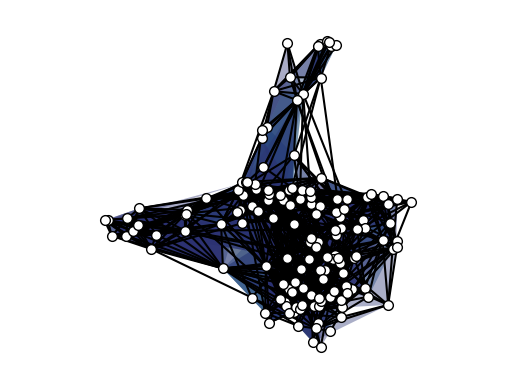

In [8]:
xgi.draw(H_enron_cleaned)

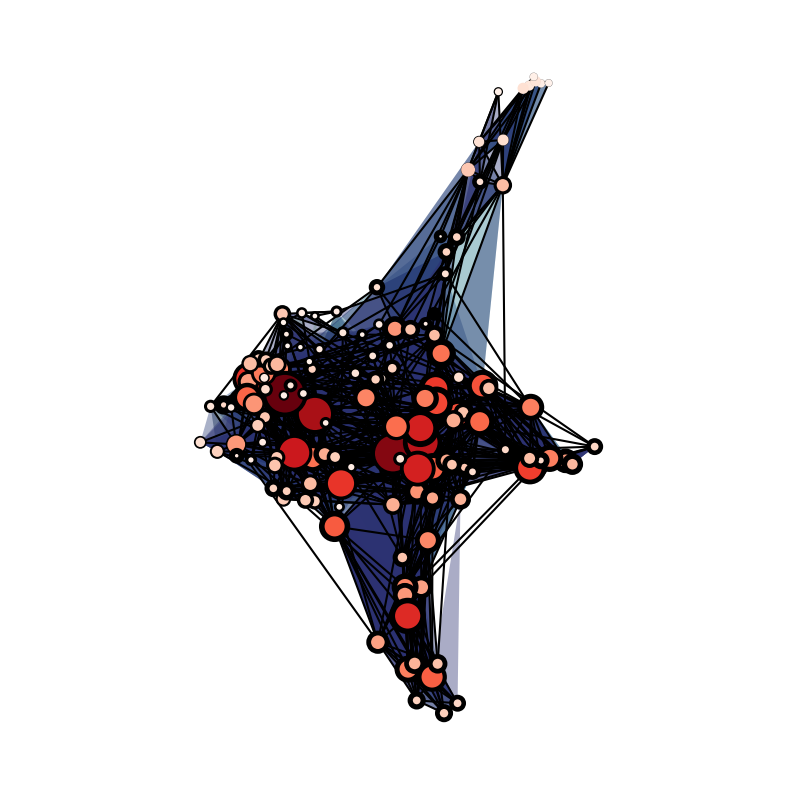

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))
xgi.draw(
    H_enron_cleaned,
    node_size=H_enron_cleaned.nodes.degree,
    node_lw=H_enron_cleaned.nodes.average_neighbor_degree,
    node_fc=H_enron_cleaned.nodes.degree,
    ax=ax,
);

In [ ]:
import numpy as np
import xgi
from scipy.sparse import load_npz


# Load the .npz file
data = load_npz('../Data/hypergraphs/DGIDB_HumanNet/neighbor/bipolar_k=10_h=1/hypergraph_incidence_matrix_binary.npz')


# Assume the incidence matrix is stored under the key 'incidence_matrix'
incidence_matrix = data
# Convert to hypergraph
H = xgi.from_incidence_matrix(incidence_matrix)

(4774, 17908)


In [2]:
isolated_nodes = H.nodes.isolates()
print("Number of isolated nodes: ", len(isolated_nodes))
duplicated_edges = H.edges.duplicates()
print("Number of duplicated edges: ", len(duplicated_edges))

Number of isolated nodes:  0
Number of duplicated edges:  375


In [17]:
import pandas as pd
dgidb = pd.read_csv("../Data/DGIDB/converted/human/dgidb_ncbi_v2.csv")

def get_gene_claim_name(ncbi_gene_id):
    ncbi_gene_id = int(ncbi_gene_id)
    # result = dgidb[dgidb['ncbi_gene_id'] == ncbi_gene_id]
    result = dgidb[(dgidb['ncbi_gene_id']) == ncbi_gene_id]
    if not result.empty:
        return result['gene_name'].values[0]
    else:
        return "Gene name not found"
import json

# Define file paths
gene_to_index_path = "../Data/hypergraphs/DGIDB_HumanNet/human/undirected/temp/gene_to_index.json"
with open(gene_to_index_path, "r") as f:
    gene_to_index = json.load(f)
# Swap keys and values
index_to_gene = {v: k for k, v in gene_to_index.items()}
# Apply function to values
index_to_gene_name = {index: get_gene_claim_name(gene_id) for index, gene_id in index_to_gene.items()}

print(index_to_gene_name)

{0: 'CYP2D6', 1: 'PPARG', 2: 'ATAD5', 3: 'RGS4', 4: 'MAPK1', 5: 'AGTR1', 6: 'KDR', 7: 'PARP1', 8: 'NUDT2', 9: 'DTNB', 10: 'F10', 11: 'RYR3', 12: 'KIT', 13: 'CCL4', 14: 'CSF2', 15: 'BAZ2B', 16: 'JUN', 17: 'EHMT2', 18: 'CSNK2A3', 19: 'ADRB1', 20: 'SCN10A', 21: 'AQP1', 22: 'FGFR3', 23: 'ADRB3', 24: 'PLG', 25: 'KCND3', 26: 'RPL28', 27: 'ESR1', 28: 'POLK', 29: 'GPR55', 30: 'HIF1A', 31: 'DRD2', 32: 'ANXA2P1', 33: 'PRMT1', 34: 'FGFR1', 35: 'HDAC9', 36: 'NR3C1', 37: 'RAB40B', 38: 'CACNA1D', 39: 'NR1H4', 40: 'SMAD3', 41: 'CSF1R', 42: 'CAMK2D', 43: 'IL6R', 44: 'RPS6KB1', 45: 'HIPK4', 46: 'NSD2', 47: 'CYP2C9', 48: 'PTGS1', 49: 'AQP3', 50: 'AVPR1A', 51: 'HMGCR', 52: 'KDM4A', 53: 'CD274', 54: 'GCNT2', 55: 'PAK4', 56: 'ERBB2', 57: 'ASAH1', 58: 'GRIN2D', 59: 'EDN1', 60: 'KLK3', 61: 'LEP', 62: 'KAT2A', 63: 'RAD52', 64: 'PPARD', 65: 'CRHR2', 66: 'GABRP', 67: 'CD8B', 68: 'MAP2K2', 69: 'FPR1', 70: 'CFTR', 71: 'PTK2B', 72: 'C10orf67', 73: 'MAP2K1', 74: 'GLP1R', 75: 'PIK3R6', 76: 'RARG', 77: 'BTK', 78: 'IG

In [25]:
# Keep only the keys that exist in H.nodes
index_to_gene_name = {index: name for index, name in index_to_gene_name.items() if index in H.nodes}

print("Filtered index_to_gene_name:", index_to_gene_name)


Filtered index_to_gene_name: {0: 'CYP2D6', 1: 'PPARG', 2: 'ATAD5', 3: 'RGS4', 4: 'MAPK1', 5: 'AGTR1', 6: 'KDR', 7: 'PARP1', 8: 'NUDT2', 10: 'F10', 11: 'RYR3', 12: 'KIT', 13: 'CCL4', 14: 'CSF2', 15: 'BAZ2B', 16: 'JUN', 17: 'EHMT2', 19: 'ADRB1', 20: 'SCN10A', 21: 'AQP1', 22: 'FGFR3', 23: 'ADRB3', 24: 'PLG', 25: 'KCND3', 27: 'ESR1', 28: 'POLK', 29: 'GPR55', 30: 'HIF1A', 31: 'DRD2', 34: 'FGFR1', 35: 'HDAC9', 36: 'NR3C1', 37: 'RAB40B', 38: 'CACNA1D', 39: 'NR1H4', 40: 'SMAD3', 41: 'CSF1R', 42: 'CAMK2D', 43: 'IL6R', 44: 'RPS6KB1', 45: 'HIPK4', 46: 'NSD2', 47: 'CYP2C9', 48: 'PTGS1', 49: 'AQP3', 50: 'AVPR1A', 51: 'HMGCR', 52: 'KDM4A', 53: 'CD274', 55: 'PAK4', 56: 'ERBB2', 57: 'ASAH1', 58: 'GRIN2D', 59: 'EDN1', 60: 'KLK3', 61: 'LEP', 62: 'KAT2A', 63: 'RAD52', 64: 'PPARD', 65: 'CRHR2', 66: 'GABRP', 67: 'CD8B', 68: 'MAP2K2', 69: 'FPR1', 70: 'CFTR', 71: 'PTK2B', 72: 'C10orf67', 73: 'MAP2K1', 74: 'GLP1R', 75: 'PIK3R6', 76: 'RARG', 77: 'BTK', 78: 'IGF1R', 79: 'MDM2', 80: 'TERT', 81: 'EGFR', 82: 'ALK'

In [29]:
import matplotlib.pyplot as plt

# Create a large figure to accommodate all nodes
fig, ax = plt.subplots(figsize=(50, 50))

# Draw the hypergraph
xgi.draw(
    H,
    node_size=H.nodes.degree,
    node_lw=H.nodes.average_neighbor_degree,
    node_fc=H.nodes.degree,
    node_labels=index_to_gene_name,
    ax=ax,
)

# Add labels to nodes
# for node in H_clean.nodes:
#     x, y = H_clean.nodes[node]["pos"]  # Assuming nodes have a "pos" attribute
#     ax.text(x, y, str(node), fontsize=4, ha='center', va='center', color='black')

# Save the image with high resolution
plt.savefig("hypergraph_large.png", dpi=1200)
plt.close(fig)  # Close to free memory